In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File paths
dataset_paths = {
    "2018": "2018_cleaned_personal_property_list.csv",
    "2019": "2019_cleaned_personal_property_list.csv",
    "2020": "2020_cleaned_personal_property_list.csv",
    "2021": "2021_cleaned_personal_property_list.csv",
    "2022": "2022_cleaned_personal_property_list.csv",
    "2023": "2023_cleaned_personal_property_list.csv",
    "2024": "2024_cleaned_personal_property_list.csv",
}

In [3]:
# Load and merge datasets
dfs = []
for year, path in dataset_paths.items():
    df = pd.read_csv(path)
    df["YEAR"] = int(year)  # Add year column
    dfs.append(df)

/var/folders/wm/3j20np153f92h_05z976byhh0000gn/T/ipykernel_88982/684107237.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
    # Combine all data into one DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Convert data types
merged_df["AGENCY_CODE"] = merged_df["AGENCY_CODE"].astype("Int64")
merged_df["PROPERTY_CLASSIFICATION"] = merged_df["PROPERTY_CLASSIFICATION"].astype("category")
merged_df["DATE_ACQUIRED_OR_INSTALLED"] = pd.to_datetime(merged_df["DATE_ACQUIRED_OR_INSTALLED"], errors="coerce")


In [5]:
# Save the integrated dataset
merged_df.to_csv("merged_cleaned_personal_property_list.csv", index=False)

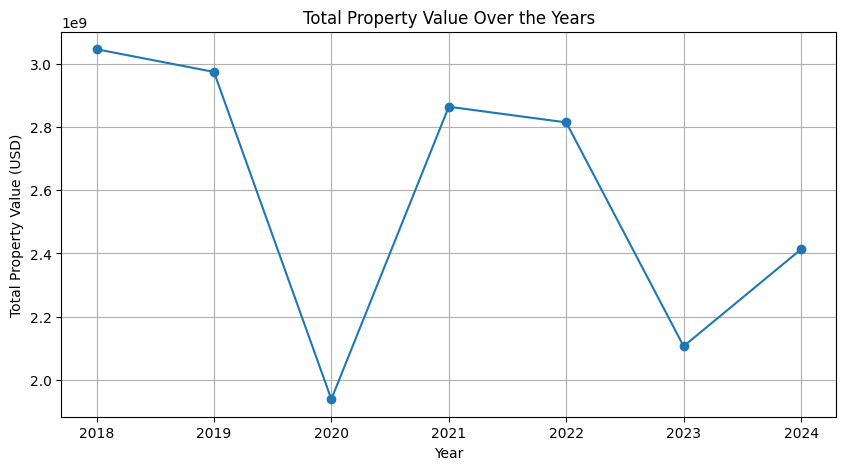

In [6]:
# ---- Trends Over the Years: Total Property Value ----
plt.figure(figsize=(10, 5))
merged_df.groupby("YEAR")["VALUE_OR_COST"].sum().plot(marker="o")
plt.xlabel("Year")
plt.ylabel("Total Property Value (USD)")
plt.title("Total Property Value Over the Years")
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

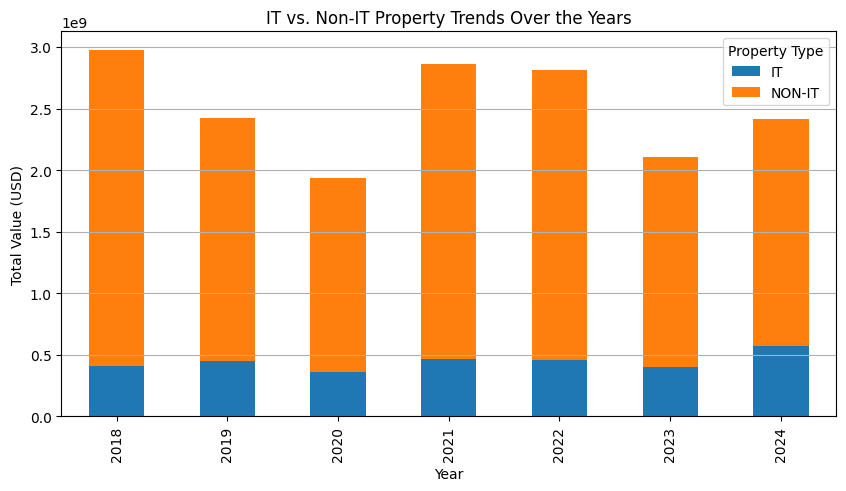

In [7]:
# ---- IT vs. Non-IT Property Analysis ----
it_vs_nonit = merged_df.groupby(["YEAR", "IT_OR_NON-IT"]) ["VALUE_OR_COST"].sum().unstack()
plt.figure(figsize=(10, 5))
it_vs_nonit.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.xlabel("Year")
plt.ylabel("Total Value (USD)")
plt.title("IT vs. Non-IT Property Trends Over the Years")
plt.legend(title="Property Type")
plt.grid(axis="y")
plt.show()

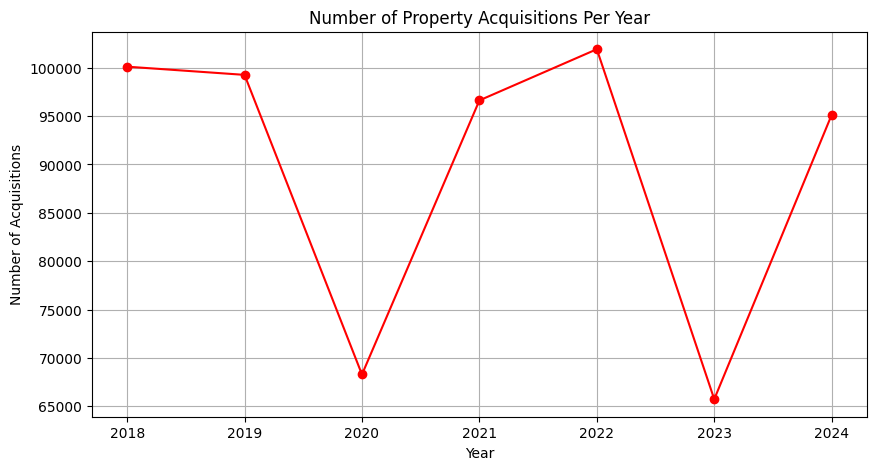

In [8]:
# ---- Acquisition Patterns: Number of Acquisitions per Year ----
plt.figure(figsize=(10, 5))
merged_df.groupby("YEAR")["PROPERTY_NAME"].count().plot(marker="o", color="r")
plt.xlabel("Year")
plt.ylabel("Number of Acquisitions")
plt.title("Number of Property Acquisitions Per Year")
plt.grid(True)
plt.show()

In [9]:
# Display the first few rows of merged dataset
merged_df.head()


AGENCY_CODE    STATE_AGENCY      PROPERTY_TYPE PROPERTY_CLASSIFICATION  \
0           10  OSU-STILLWATER  Personal Property                   Owned   
1           10  OSU-STILLWATER  Personal Property                   Owned   
2           10  OSU-STILLWATER  Personal Property                   Owned   
3           10  OSU-STILLWATER  Personal Property                   Owned   
4           10  OSU-STILLWATER  Personal Property                   Owned   

                               PROPERTY_NAME DATE_ACQUIRED_OR_INSTALLED  \
0  Data Terminal, Ti (S Cint. Ctr) Mdl 700As                 1977-08-15   
1                    Hp Graphics Translat Or                 1981-08-07   
2        Single Channel Ekg Printer/Recorder                 1982-05-26   
3          4643596 Typewriter S Electric Iii                 1982-12-15   
4   Software Composition Of Tatex From 83-96                 1983-09-12   

   VALUE_OR_COST IT_OR_NON-IT  YEAR  
0       20600.00           IT  2018  
1        9328.93           IT  2018  
2        5625.00           IT  2018  
3         913.80           IT  2018  
4       97880.55           IT  2018